In [1]:
!pip install researchpy

In [2]:
!pip install missingno

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
import researchpy as rp
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
#pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [4]:
df=pd.read_csv('/Users/serhandulger/Documents/Miuul_DS_Path/CRM Analitiği/FLO_RFM_Analizi/flo_data_20k.csv')

In [5]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [6]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### NA SUM #####################")
    print(dataframe.isnull().sum().sum())
    print("##################### Describe #####################")
    print(dataframe.describe())
    print("##################### Nunique #####################")
    print(dataframe.nunique())

In [7]:
check_df(df)

##################### Shape #####################
(19945, 12)
##################### Types #####################
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
##################### Head #####################
                              master_id order_channel last_order_channel first_order_date last_order_date last_order_date_online last_order_date_offline  order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online     

In [8]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

In [9]:
missing_values_analysis(df)

,Total Missing Values,Ratio


In [10]:
def data_visualizations(data):
    import missingno as msno
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("VISUALIZING", "\n\n")
    msno.bar(data)
    plt.show()
    #msno.heatmap(data)
    #plt.show()
    msno.matrix(data)
    plt.show()
    print("CORRELATION GRAPH", "\n\n")
    plt.figure(figsize=(14, 12))
    #sns.heatmap(data.corr(), annot=True, cmap="BuPu")
    #plt.show()
    #sns.pairplot(data)
    #plt.show()

VISUALIZING 




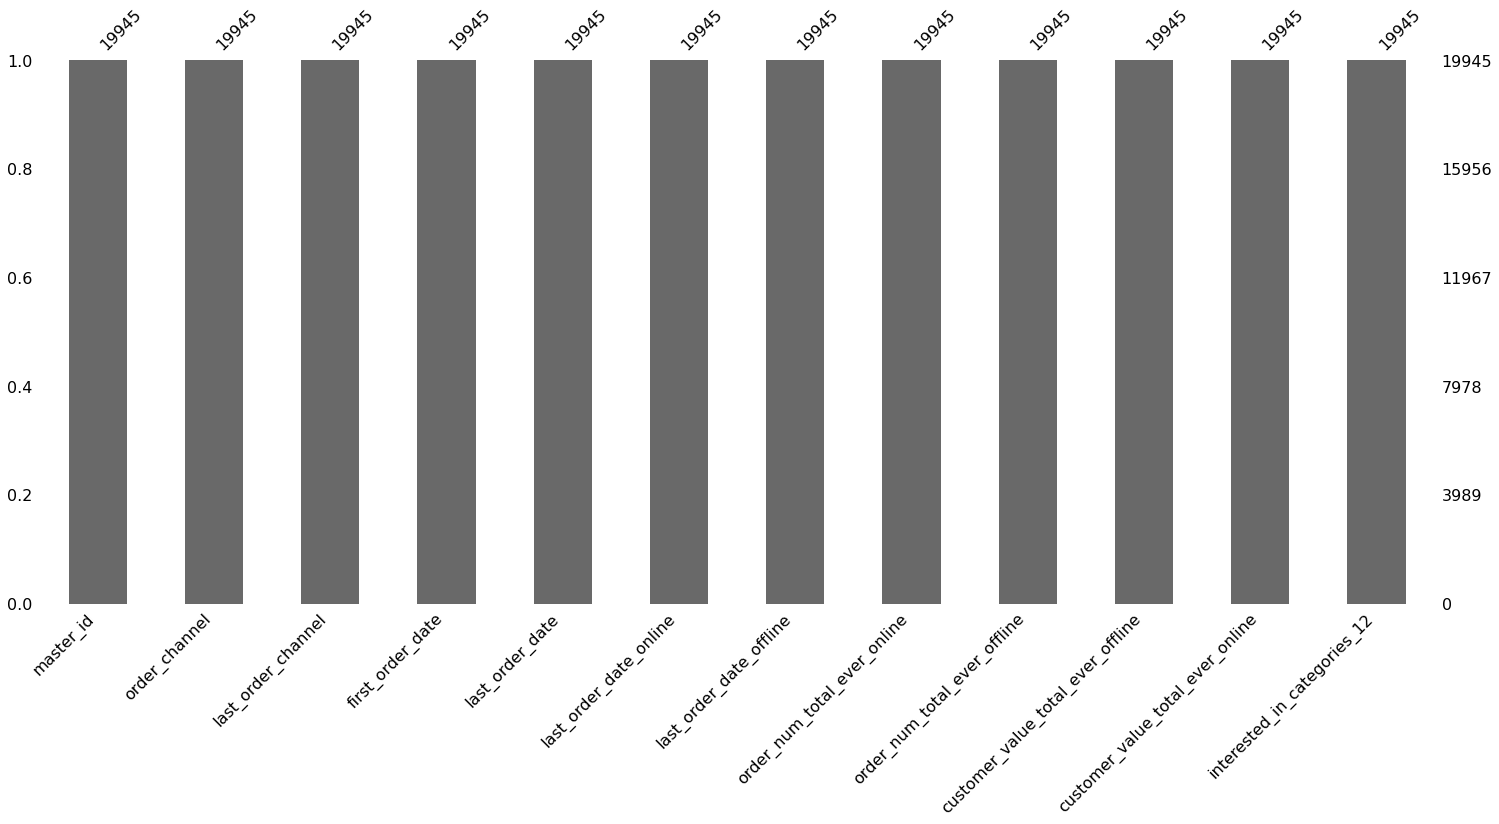

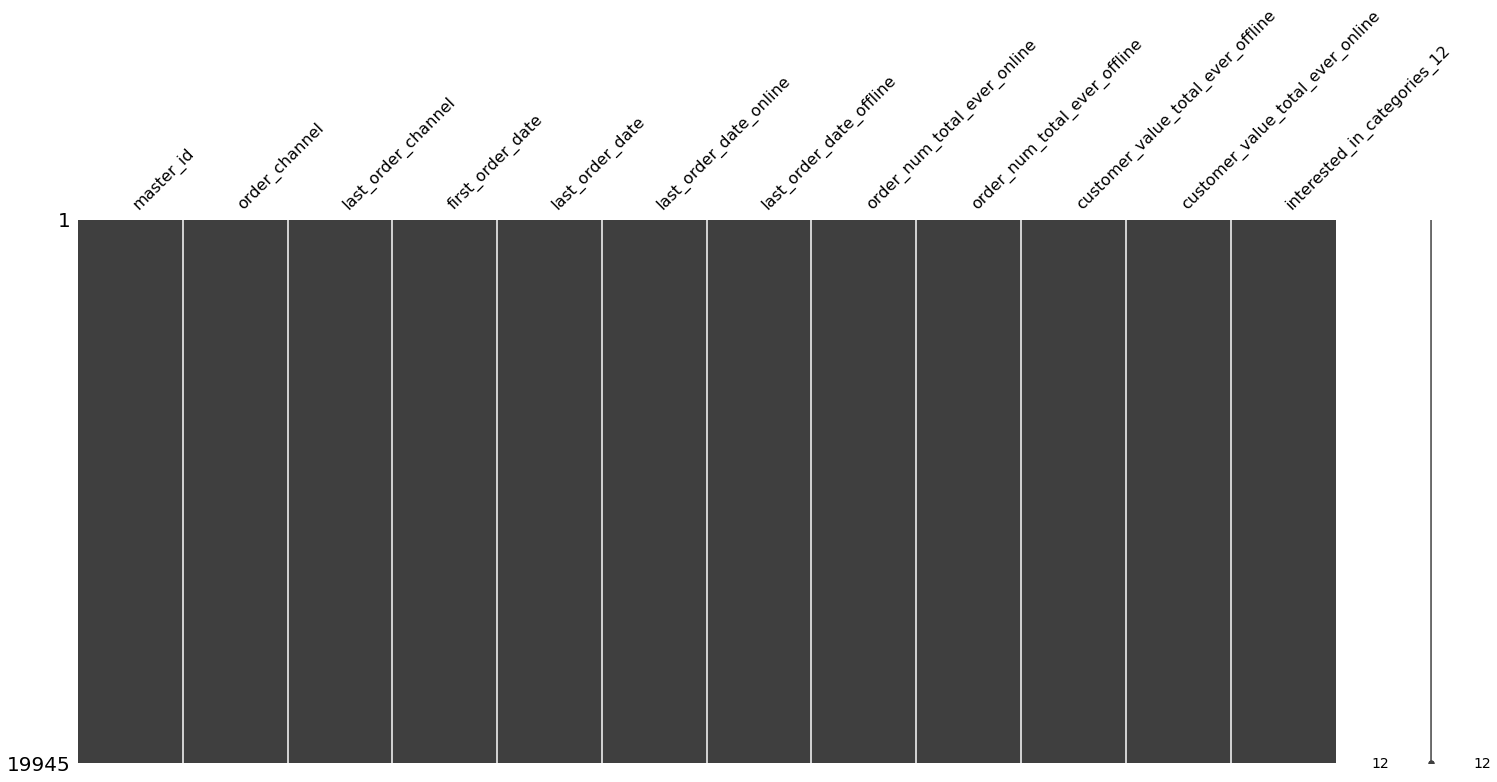

CORRELATION GRAPH 




<Figure size 1008x864 with 0 Axes>

In [11]:
data_visualizations(df)

In [12]:
df.head(2)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"


In [13]:
import datetime as dt
df["first_order_date"] = pd.to_datetime(df["first_order_date"]).dt.normalize()
df["last_order_date"] = pd.to_datetime(df["last_order_date"]).dt.normalize()
df["last_order_date_online"] = pd.to_datetime(df["last_order_date_online"]).dt.normalize()
df["last_order_date_offline"] = pd.to_datetime(df["last_order_date_offline"]).dt.normalize()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [15]:
def create_date_features(df):
    df['first_order_month'] = df["first_order_date"].dt.month
    df['first_order_day_of_month'] = df["first_order_date"].dt.day
    df['first_order_day_of_week'] = df["first_order_date"].dt.dayofweek
    df['first_order_year'] = df["first_order_date"].dt.year
    df["first_order_is_wknd"] = df["first_order_date"].dt.weekday // 4
    return df

In [16]:
def grab_col_names(dataframe, cat_th=13, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [17]:
def cat_summary(dataframe,col_name,plot=False):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                        "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    import seaborn as sns
    import matplotlib.pyplot as plt
    if plot:
        sns.countplot(x=dataframe[col_name],data=dataframe)
        plt.show()

In [18]:
create_date_features(df)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,first_order_month,first_order_day_of_month,first_order_day_of_week,first_order_year,first_order_is_wknd
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],10,30,4,2020,1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2,8,2,2017,0
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",11,27,2,2019,0
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",1,6,2,2021,0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],8,3,5,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.0,2.0,289.98,111.98,"[ERKEK, AKTIFSPOR]",9,21,5,2019,1
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.0,1.0,150.48,239.99,[AKTIFSPOR],3,1,6,2020,1
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.0,1.0,139.98,492.96,[AKTIFSPOR],9,11,2,2019,0
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.0,5.0,711.79,297.98,"[ERKEK, AKTIFSPOR]",3,27,2,2019,0


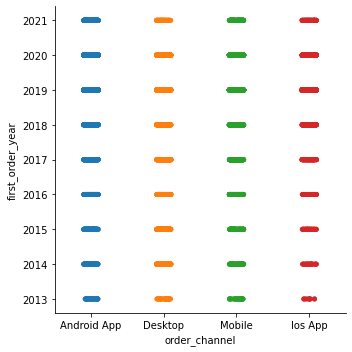

In [19]:
# We checked the dataset to see if there are any order channels in other years.
sns.catplot(x="order_channel",y="first_order_year",data=df)

In [20]:
cat_cols , num_cols, cat_but_car = grab_col_names(df)

Observations: 19945
Variables: 17
cat_cols: 6
num_cols: 9
cat_but_car: 2
num_but_cat: 4


             order_channel      Ratio
Android App           9495  47.605916
Mobile                4882  24.477313
Ios App               2833  14.204061
Desktop               2735  13.712710
##########################################


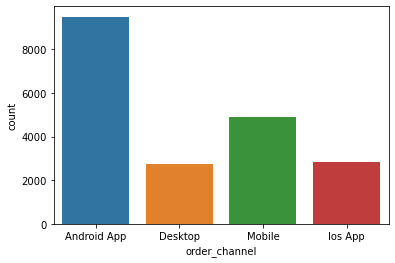

None
             last_order_channel      Ratio
Android App                6783  34.008523
Offline                    6608  33.131111
Mobile                     3172  15.903735
Ios App                    1696   8.503384
Desktop                    1686   8.453246
##########################################


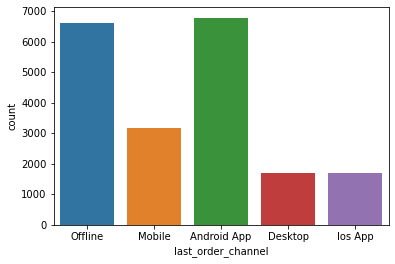

None
    first_order_month      Ratio
3                2108  10.569065
11               2053  10.293307
2                2038  10.218100
10               1828   9.165204
7                1745   8.749060
9                1715   8.598646
12               1606   8.052143
4                1596   8.002006
8                1525   7.646027
1                1398   7.009276
5                1233   6.182001
6                1100   5.515167
##########################################


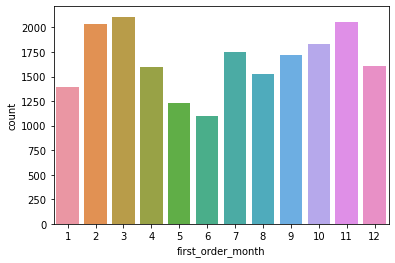

None
   first_order_day_of_week      Ratio
5                     3387  16.981700
6                     3386  16.976686
0                     2680  13.436952
3                     2655  13.311607
2                     2632  13.196290
4                     2631  13.191276
1                     2574  12.905490
##########################################


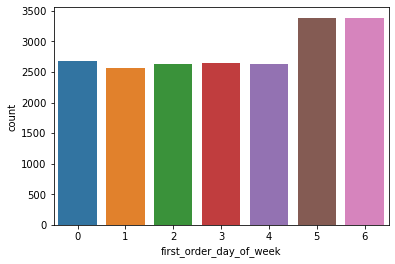

None
      first_order_year      Ratio
2019             10352  51.902733
2020              4412  22.120832
2018              1630   8.172474
2017              1160   5.815994
2016               662   3.319128
2015               614   3.078466
2021               581   2.913011
2014               405   2.030584
2013               129   0.646779
##########################################


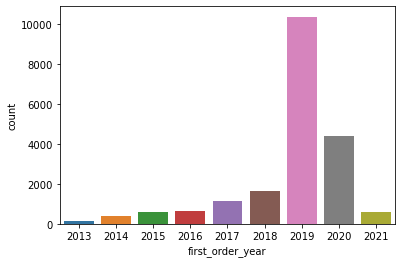

None
   first_order_is_wknd      Ratio
0                10541  52.850338
1                 9404  47.149662
##########################################


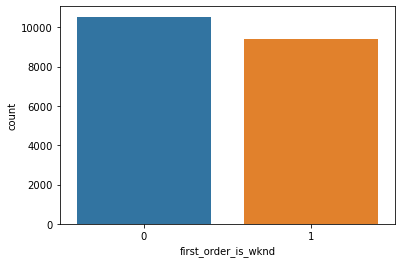

None


In [21]:
for i in cat_cols:
    print(cat_summary(df,i,plot=True))

In [22]:
cat_cols

['order_channel',
 'last_order_channel',
 'first_order_month',
 'first_order_day_of_week',
 'first_order_year',
 'first_order_is_wknd']

In [23]:
df["Total_Order"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["Total_Payment"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [25]:
df.master_id.nunique()

19945

### Calculation of RFM Metrics

In [26]:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [27]:
import datetime as dt
today_date = dt.datetime(2021,6,2)
today_date

datetime.datetime(2021, 6, 2, 0, 0)

In [28]:
rfm = df.groupby("master_id").agg({"last_order_date": lambda x: (today_date - x.max()).days,
                                     "Total_Order": lambda x: x.sum(),
                                     "Total_Payment": lambda x: x.sum()})
rfm.head(10)

,last_order_date,Total_Order,Total_Payment
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.0,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.0,269.47
000be838-85df-11ea-a90b-000d3a38a36f,214,4.0,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.0,1620.33
00136ce2-a562-11e9-a2fc-000d3a38a36f,204,2.0,359.45
00142f9a-7af6-11eb-8460-000d3a38a36f,26,3.0,404.94
0014778a-5b11-11ea-9a2c-000d3a38a36f,27,3.0,727.43
0018c6aa-ab6c-11e9-a2fc-000d3a38a36f,127,2.0,317.91


In [29]:
rfm.columns = ["Recency","Frequency","Monetary"]

In [30]:
rfm["recency_score"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"),5,labels=[1,2,3,4,5])
rfm["monetary_score"] = pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])

In [31]:
rfm["RFM_score"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)

In [32]:
# RFM segment tags
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'}

rfm["segment"] = rfm["RFM_score"].replace(seg_map,regex=True)
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_score,segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.0,776.07,5,4,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.0,269.47,1,2,1,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,214,4.0,722.69,2,3,4,23,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0,874.16,5,4,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.0,1620.33,5,4,5,54,champions


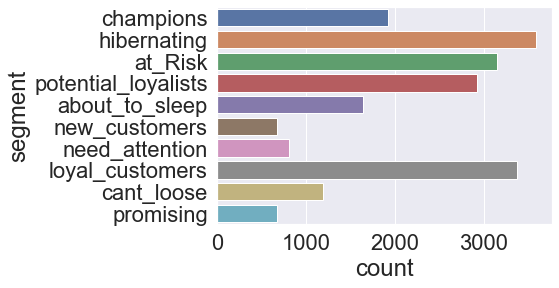

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2)
sns.countplot(y=rfm["segment"],data=rfm)
plt.show()

In [34]:
rfm[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(["count","mean","std","min","max"])

Recency                                  Frequency                                  Monetary                                            
                      count        mean        std  min  max     count       mean       std  min    max    count         mean          std     min       max
segment                                                                                                                                                     
about_to_sleep         1643  115.031649  17.788519   85  146      1643   2.406573  0.491343  2.0    3.0     1643   361.649373   191.011992   49.98   1607.45
at_Risk                3152  243.328997  65.925758  147  368      3152   4.470178  0.987256  3.0    7.0     3152   648.325038   310.139296  115.88   3615.67
cant_loose             1194  236.159129  62.748622  147  368      1194  10.716918  6.685130  7.0  111.0     1194  1481.652446   996.622565  274.42  12103.15
champions              1920   18.142187   9.151615    3   34      1920   8.965104  7.766078  4.0  202.0     1920  1410.708938  1673.289080  132.94  45905.10
hibernating            3589  248.426303  66.934009  147  368      3589   2.391474  0.488148  2.0    3.0     3589   362.583299   203.146979   44.98   2533.04
loyal_customers        3375   83.557926  32.263137   35  146      3375   8.356444  5.677047  4.0   83.0     3375  1216.257224  1187.938117  208.46  36818.29
need_attention          806  114.037221  17.732060   85  146       806   3.739454  0.439205  3.0    4.0      806   553.436638   291.318240   80.86   4361.44
new_customers           673   18.976226   9.222580    3   34       673   2.000000  0.000000  2.0    2.0      673   344.049495   193.722587   65.91   1725.38
potential_loyalists    2925   37.869744  23.728236    3   84      2925   3.310769  0.602239  2.0    4.0     2925   533.741344   461.282338   69.98  20706.34
promising               668   59.694611  14.804053   35   84       668   2.000000  0.000000  2.0    2.0      668   334.153338   170.906675   44.98   1357.32

In [35]:
rfm.describe()

,Recency,Frequency,Monetary
count,19945.000000,19945.000000,19945.000000
mean,135.458360,5.024768,751.244287
std,103.281149,4.742707,895.402173
min,3.000000,2.000000,44.980000
25%,44.000000,3.000000,339.980000
50%,112.000000,4.000000,545.270000
75%,203.000000,6.000000,897.780000
max,368.000000,202.000000,45905.100000


In [36]:
rfm

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_score,segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.0,776.07,5,4,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.0,269.47,1,2,1,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,214,4.0,722.69,2,3,4,23,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0,874.16,5,4,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.0,1620.33,5,4,5,54,champions
...,...,...,...,...,...,...,...,...
fff1db94-afd9-11ea-b736-000d3a38a36f,184,5.0,796.87,2,4,4,24,at_Risk
fff4736a-60a4-11ea-8dd8-000d3a38a36f,68,2.0,318.87,4,2,2,42,potential_loyalists
fffacd34-ae14-11e9-a2fc-000d3a38a36f,258,6.0,983.92,1,4,4,14,at_Risk


In [37]:
rfm['Monetary'].describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    19945.000000
mean       751.244287
std        895.402173
min         44.980000
25%        339.980000
50%        545.270000
75%        897.780000
90%       1429.938000
95%       1921.924000
99%       3606.355600
max      45905.100000
Name: Monetary, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


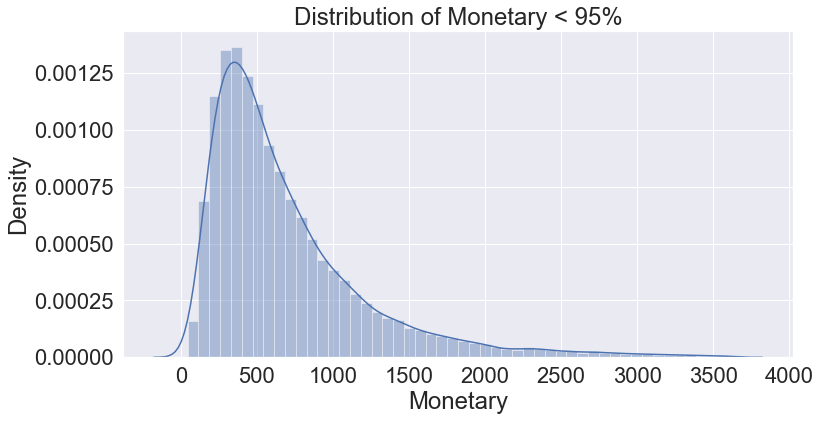

In [38]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Monetary < 95%')
sns.distplot(rfm[rfm['Monetary']<3606].Monetary);

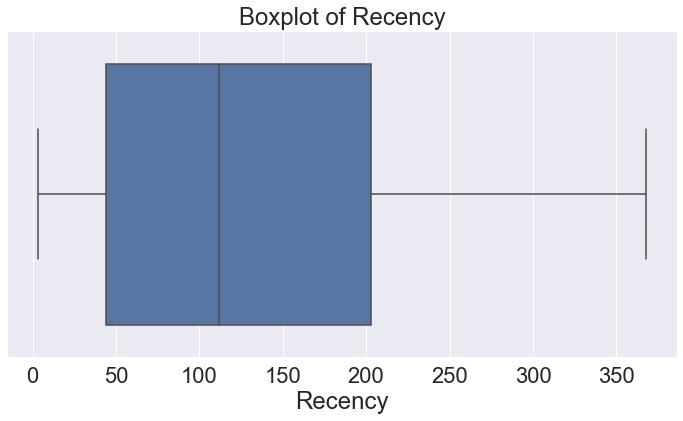

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Recency', data=rfm)
plt.title('Boxplot of Recency');

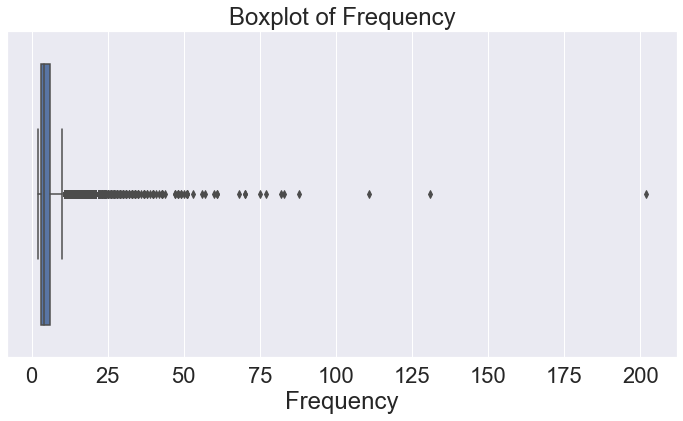

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Frequency', data=rfm)
plt.title('Boxplot of Frequency');

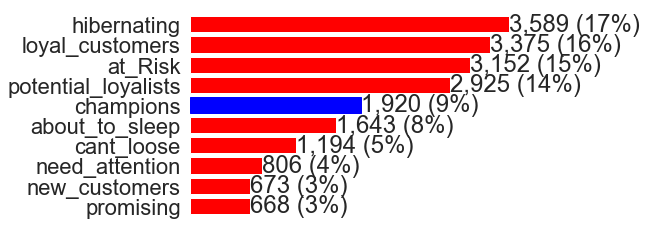

In [41]:
segments_counts = rfm['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='red')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions']:
            bar.set_color('Blue')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left')
plt.show()


## Functionalize All Steps 

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
import researchpy as rp
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
#pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [43]:
df = pd.read_csv('/Users/serhandulger/Documents/Miuul_DS_Path/CRM Analitiği/FLO_RFM_Analizi/flo_data_20k.csv')

In [44]:
def data_preprocessing(dataframe):
    
    dataframe.dropna(inplace=True)
    
    dataframe["first_order_date"] = pd.to_datetime(dataframe["first_order_date"]).dt.normalize()
    dataframe["last_order_date"] = pd.to_datetime(dataframe["last_order_date"]).dt.normalize()
    dataframe["last_order_date_online"] = pd.to_datetime(dataframe["last_order_date_online"]).dt.normalize()
    dataframe["last_order_date_offline"] = pd.to_datetime(dataframe["last_order_date_offline"]).dt.normalize()

    
    dataframe["Total_Order"] = dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"]
    dataframe["Total_Payment"] = dataframe["customer_value_total_ever_offline"] + dataframe["customer_value_total_ever_online"]
    
    return dataframe

In [45]:
def rfm_segmentation(dataframe):
    
    import datetime as dt
    today_date = dt.datetime(2021,6,2)
    
    rfm = dataframe.groupby("master_id").agg({"last_order_date": lambda x: (today_date - x.max()).days,
                                     "Total_Order": lambda x: x.sum(),
                                     "Total_Payment": lambda x: x.sum()})
    
    rfm.columns = ["Recency","Frequency","Monetary"]
    
    rfm["recency_score"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])
    rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"),5,labels=[1,2,3,4,5])
    rfm["monetary_score"] = pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])
    
    rfm["RFM_score"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)
    
    # RFM isimlendirmesi
    seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_Risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'}

    rfm["segment"] = rfm["RFM_score"].replace(seg_map,regex=True)
    return rfm

In [46]:
def visualize_segments(rfm):
    import matplotlib.pyplot as plt
    segments_counts = rfm['segment'].value_counts().sort_values(ascending=True)

    fig, ax = plt.subplots()

    bars = ax.barh(range(len(segments_counts)),
                  segments_counts,
                  color='red')
    ax.set_frame_on(False)
    ax.tick_params(left=False,
                   bottom=False,
                   labelbottom=False)
    ax.set_yticks(range(len(segments_counts)))
    ax.set_yticklabels(segments_counts.index)

    for i, bar in enumerate(bars):
            value = bar.get_width()
            if segments_counts.index[i] in ['champions']:
                bar.set_color('Blue')
            ax.text(value,
                    bar.get_y() + bar.get_height()/2,
                    '{:,} ({:}%)'.format(int(value),
                                       int(value*100/segments_counts.sum())),
                    va='center',
                    ha='left')
    plt.show()

In [47]:
def rfm_pipeline(dataframe):
    dataframe = data_preprocessing(dataframe)
    rfm = rfm_segmentation(dataframe)
    visualized = visualize_segments(rfm)
    return dataframe , rfm , visualized

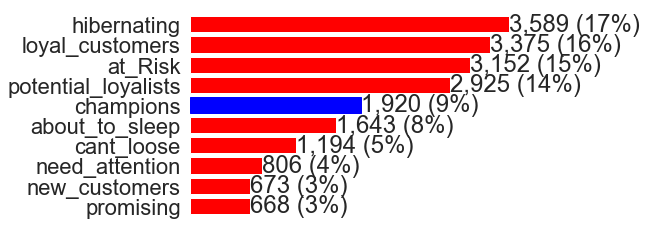

In [48]:
dataframe , rfm, visualized = rfm_pipeline(df)

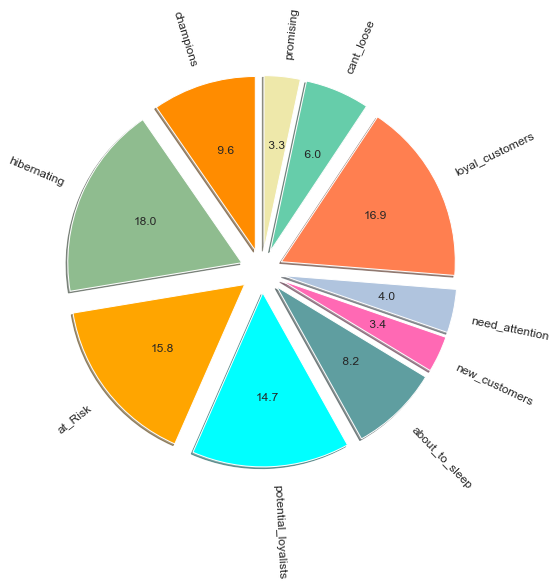

In [49]:
colors  = ("darkorange", "darkseagreen", "orange", "cyan", "cadetblue", "hotpink", "lightsteelblue", "coral",  "mediumaquamarine","palegoldenrod")
explodes = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

rfm["segment"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True, 
                                                 explode = explodes)
plt.ylabel("");

#### Business Scenarios

In [50]:
df = dataframe

In [51]:
df.head(2)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Total_Order,Total_Payment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55


In [52]:
# Top 10 customers with the most profits

df.groupby(["master_id"])["Total_Payment"].sum().sort_values(ascending=False).to_frame("total_profit").reset_index().head(10)

,master_id,total_profit
0,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
1,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
2,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
3,7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
4,47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34
5,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57
6,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57
7,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10
8,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24
9,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,12103.15


In [53]:
# Top 10 customers with the most orders

df.groupby(["master_id"])["Total_Order"].sum().sort_values(ascending=False).to_frame("total_order").reset_index().head(10)

,master_id,total_order
0,5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.0
1,cba59206-9dd1-11e9-9897-000d3a38a36f,131.0
2,a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.0
3,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.0
4,329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.0
5,73fd19aa-9e37-11e9-9897-000d3a38a36f,82.0
6,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.0
7,b27e241a-a901-11e9-a2fc-000d3a38a36f,75.0
8,d696c654-2633-11ea-8e1c-000d3a38a36f,70.0
9,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,70.0


#### Business case 1

FLO includes a new women's shoe brand. The product prices of the brand it includes are above the general customer preferences. For this reason, it is desired to contact the customers in the profile that will be interested in the promotion of the brand and product sales. Those who shop from their loyal customers (champions, loyal_customers) and women category are the customers to be contacted specifically. Save the id numbers of these customers to the csv file.

In [54]:
segment1 = rfm[(rfm["segment"] == "champions") | (rfm["segment"] == "loyal_customers")].reset_index()

In [55]:
segment2 = df[df["interested_in_categories_12"].str.contains("KADIN")]

In [56]:
target_group = pd.merge(segment1,segment2[["interested_in_categories_12","master_id"]], on="master_id")

In [57]:
target_group.head(2)

,master_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_score,segment,interested_in_categories_12
0,000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0,874.16,5,4,4,54,champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
1,003903e0-abce-11e9-a2fc-000d3a38a36f,69,5.0,577.47,4,4,3,44,loyal_customers,[KADIN]


In [58]:
import researchpy as rp 
rp.summary_cat(target_group["segment"])

,Variable,Outcome,Count,Percent
0,segment,loyal_customers,1591,63.97
1,,champions,896,36.03


In [59]:
rp.summary_cat(target_group["interested_in_categories_12"])

,Variable,Outcome,Count,Percent
0,interested_in_categories_12,"[KADIN, AKTIFSPOR]",411,16.53
1,,"[ERKEK, KADIN, AKTIFSPOR]",353,14.19
2,,[KADIN],331,13.31
3,,"[ERKEK, KADIN]",209,8.40
4,,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",169,6.80
5,,"[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]",130,5.23
6,,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",129,5.19
7,,"[COCUK, KADIN, AKTIFSPOR]",120,4.83
8,,"[COCUK, KADIN]",119,4.78
9,,"[AKTIFCOCUK, COCUK, KADIN]",96,3.86


In [60]:
target_group["master_id"].to_csv("flo_customer_segment_case_1_id.csv")

#### Business case 2

Nearly 40% discount is planned for Men's and Children's products. It is aimed to specifically target customers who are good customers in the past, but who have not shopped for a long time, who are interested in the categories related to this discount, who should not be lost, those who are asleep and new customers. Save the ids of the customers in the appropriate profile to the csv file.

In [61]:
case2_segment1 = rfm[(rfm["segment"]=="cant_loose") | (rfm["segment"]=="about_to_sleep") | (rfm["segment"]=="new_customers")]

In [62]:
case2_segment2 = df[df["interested_in_categories_12"].str.contains("ÇOCUK | ERKEK")]

In [63]:
target_group2 = pd.merge(case2_segment1,case2_segment2[["interested_in_categories_12","master_id"]], on="master_id")

In [64]:
target_group2.head(2)

,master_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_score,segment,interested_in_categories_12
0,08ce95e8-aac9-11e9-a2fc-000d3a38a36f,238,17.0,2689.83,1,5,5,15,cant_loose,"[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]"
1,0a4e6440-a9dc-11e9-a2fc-000d3a38a36f,274,14.0,2208.53,1,5,5,15,cant_loose,"[AKTIFCOCUK, ERKEK, COCUK]"


In [65]:
target_group["master_id"].to_csv("flo_customer_segment_case_1_id.csv")